<a href="https://colab.research.google.com/github/jacogales/Desafio-TelecomX-2/blob/main/Desafio_TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Datos Tratados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('datos_tratados.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   int64  
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   int64  
 12  DeviceProtection  7032 non-null   int64  
 13  TechSupport       7032 non-null   int64  
 14  StreamingTV       7032 non-null   int64  
 15  StreamingMovies   7032 non-null   int64  
 16  Contract          7032 non-null   object 


In [8]:
df.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


# Eliminar Columnas Irrelevantes

In [9]:
cols_to_drop = ['customerID']
df.drop(columns=cols_to_drop, inplace=True)

In [10]:
df.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,No,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,No,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,No,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,No,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,No,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


# Encoding

In [11]:
# Detectar columnas categóricas (tipo object)
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Columnas categóricas a codificar:", cat_cols)

# One-hot encoding (drop_first=True para evitar multicolinealidad)
df_encoded = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True,   # quita una categoría por variable
    dtype='int8'       # ahorra memoria
)

# Verificación rápida
print("Shape original:", df.shape, "→ Shape codificado:", df_encoded.shape)
df_encoded.head()

Columnas categóricas a codificar: ['gender', 'InternetService', 'OnlineSecurity', 'Contract', 'PaymentMethod']
Shape original: (7032, 21) → Shape codificado: (7032, 26)


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,...,gender_Male,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,1,1,1,0,13,1,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [13]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Stre

# Verificar Proporcionalidad de Cancelaciones (Churn)

In [20]:
# Conteo absoluto por clase
counts = df['Churn'].value_counts()

# Proporción relativa
proportions = df['Churn'].value_counts(normalize=True) * 100

print('Churn = 1  clientes que cancelaron.\nChurn = 0  clientes que permanecieron.\n')

print("Conteo por clase:")
print(counts)
print("\nProporción por clase (%):")
print(proportions.round(2))


Churn = 1  clientes que cancelaron.
Churn = 0  clientes que permanecieron.

Conteo por clase:
Churn
0    5163
1    1869
Name: count, dtype: int64

Proporción por clase (%):
Churn
0    73.42
1    26.58
Name: proportion, dtype: float64


# Balanceo de Clases

In [22]:
# Instalar imbalanced-learn
!pip install -q imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1) Separar features y target (using the encoded dataframe)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# 2) Dividir en entrenamiento y prueba (estratificado para conservar proporciones)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 3) Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4) Verificar nuevo balance
print("Proporción original (train):")
print(y_train.value_counts(normalize=True) * 100)
print("\nProporción después de SMOTE (train):")
print(y_train_bal.value_counts(normalize=True) * 100)

Proporción original (train):
Churn
0    73.422222
1    26.577778
Name: proportion, dtype: float64

Proporción después de SMOTE (train):
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


# Correlacion y Seleccion de Variables

## Analisis de Correlacion

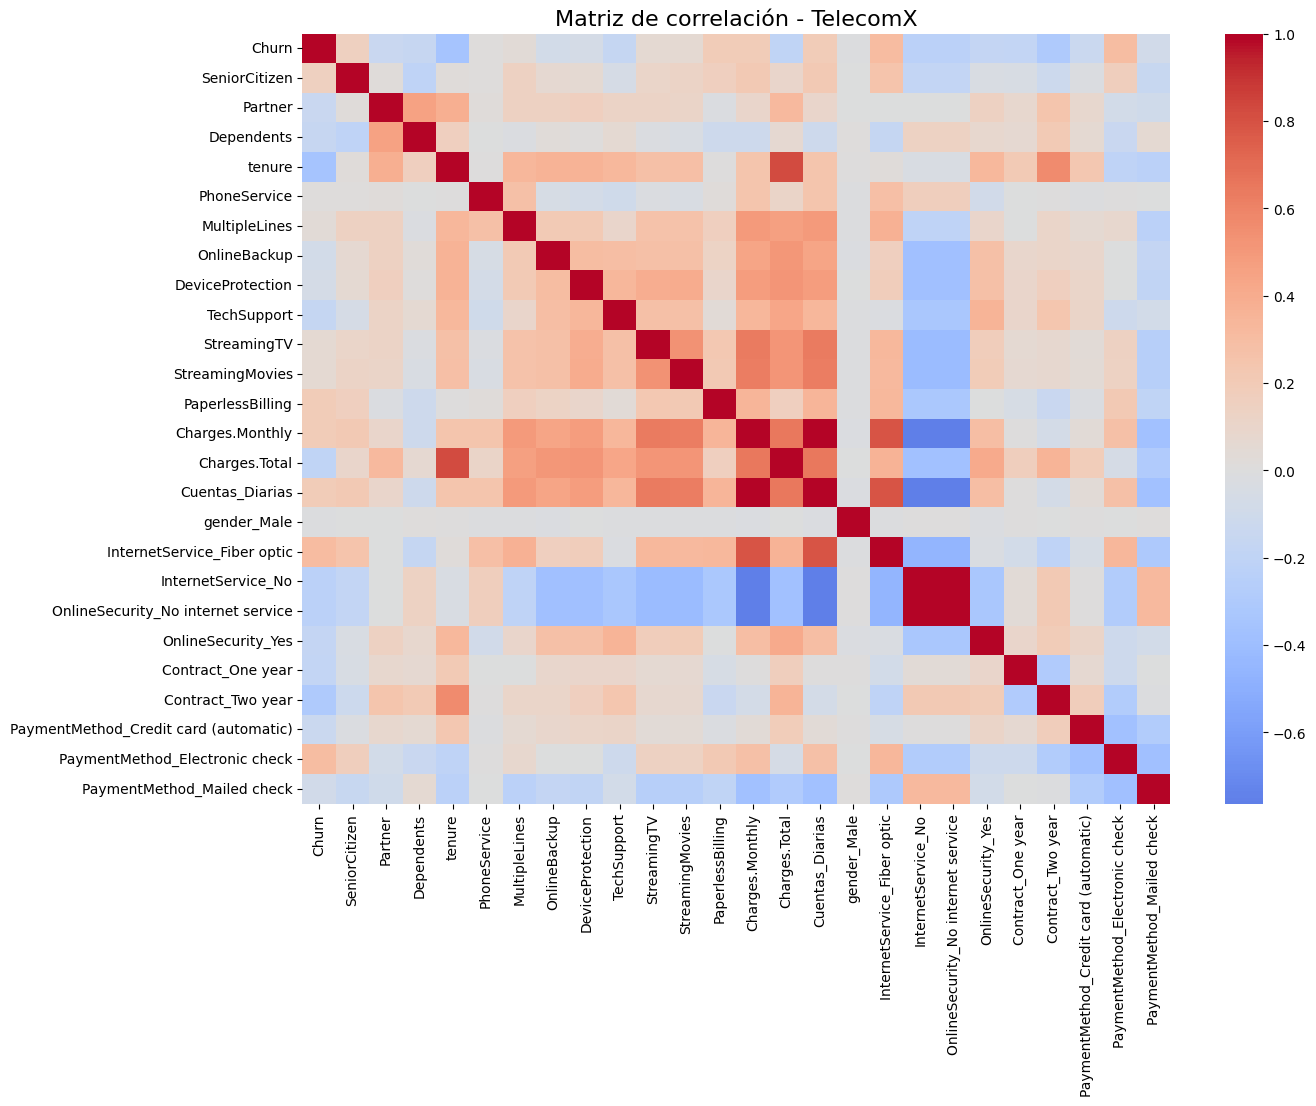

Correlación de cada variable con Churn:
Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
Cuentas_Diarias                          0.192858
Charges.Monthly                          0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV                              0.063254
StreamingMovies                          0.060860
MultipleLines                            0.040033
PhoneService                             0.011691
gender_Male                             -0.008545
DeviceProtection                        -0.066193
OnlineBackup                            -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport                             -0.164716
OnlineSecu

/tmp/ipython-input-2594538254.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


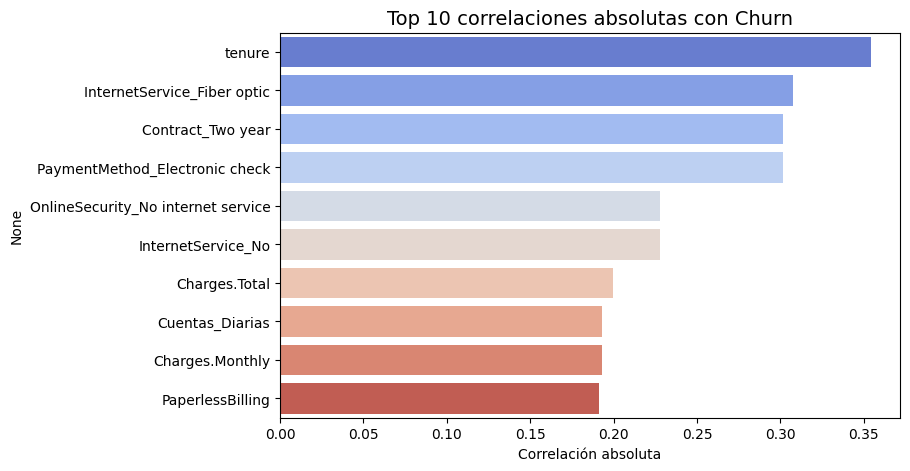

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación (solo variables numéricas)
corr_matrix = df_encoded.corr()

# --- 1) Mapa de calor completo ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=False
)
plt.title("Matriz de correlación - TelecomX", fontsize=16)
plt.show()

# --- 2) Correlaciones específicas con 'Churn' ---
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlación de cada variable con Churn:")
print(corr_with_churn)

# --- 3) Visualizar top 10 correlaciones absolutas con Churn ---
top_corr = corr_with_churn.drop('Churn').abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title("Top 10 correlaciones absolutas con Churn", fontsize=14)
plt.xlabel("Correlación absoluta")
plt.show()


# Analisis Dirigido

/tmp/ipython-input-3097580408.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_encoded, palette="Set2")


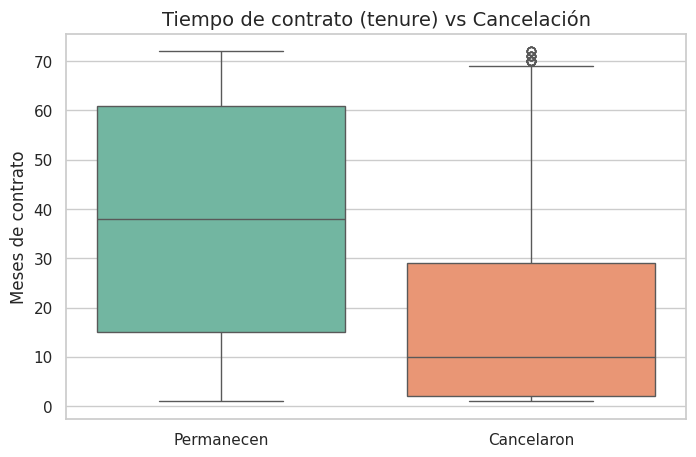

/tmp/ipython-input-3097580408.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df_encoded, palette="Set2")


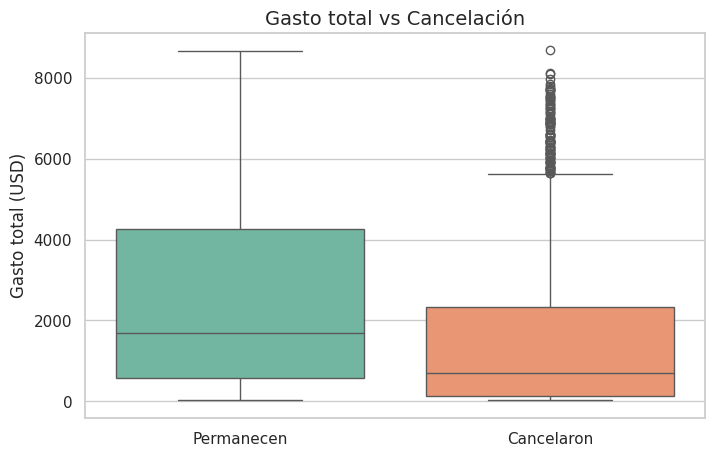

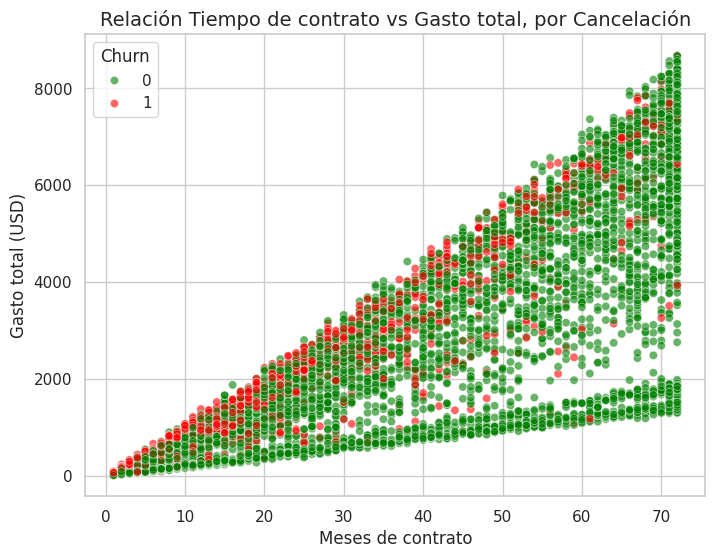

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que la estética sea uniforme
sns.set(style="whitegrid")

# --- 1) Tiempo de contrato (tenure) vs Cancelación ---
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df_encoded, palette="Set2")
plt.title("Tiempo de contrato (tenure) vs Cancelación", fontsize=14)
plt.xticks([0, 1], ['Permanecen', 'Cancelaron'])
plt.xlabel("")
plt.ylabel("Meses de contrato")
plt.show()

# --- 2) Gasto total (Charges.Total) vs Cancelación ---
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Charges.Total', data=df_encoded, palette="Set2")
plt.title("Gasto total vs Cancelación", fontsize=14)
plt.xticks([0, 1], ['Permanecen', 'Cancelaron'])
plt.xlabel("")
plt.ylabel("Gasto total (USD)")
plt.show()

# --- 3) Scatter plot para ver patrón conjunto ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='tenure',
    y='Charges.Total',
    hue='Churn',
    data=df_encoded,
    palette={0:"green", 1:"red"},
    alpha=0.6
)
plt.title("Relación Tiempo de contrato vs Gasto total, por Cancelación", fontsize=14)
plt.xlabel("Meses de contrato")
plt.ylabel("Gasto total (USD)")
plt.show()


# Modelado Predictivo

## Separacion de Datos

In [25]:
from sklearn.model_selection import train_test_split

# Definir X (features) e y (target)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# División 80% train - 20% test, estratificada por la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,      # mantiene la proporción de clases
    random_state=42  # reproducibilidad
)

# Revisar shapes
print("Tamaño entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño prueba:", X_test.shape, y_test.shape)

# Verificar proporción de clases en train y test
print("\nProporción en train:")
print((y_train.value_counts(normalize=True) * 100).round(2))
print("\nProporción en test:")
print((y_test.value_counts(normalize=True) * 100).round(2))


Tamaño entrenamiento: (5625, 25) (5625,)
Tamaño prueba: (1407, 25) (1407,)

Proporción en train:
Churn
0    73.42
1    26.58
Name: proportion, dtype: float64

Proporción en test:
Churn
0    73.42
1    26.58
Name: proportion, dtype: float64


# Creacion de Modelos

In [26]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Proporción después de SMOTE (train):")
print((y_train_bal.value_counts(normalize=True) * 100).round(2))

Proporción después de SMOTE (train):
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo 1: Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_bal, y_train_bal)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# --- Evaluación en el set de prueba ---
for name, model in [("Árbol de Decisión", dt_model), ("Random Forest", rf_model)]:
    print(f"\n Resultados para {name}:")
    y_pred = model.predict(X_test)

    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))



 Resultados para Árbol de Decisión:
Accuracy: 0.7292

Matriz de Confusión:
 [[814 219]
 [162 212]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1033
           1       0.49      0.57      0.53       374

    accuracy                           0.73      1407
   macro avg       0.66      0.68      0.67      1407
weighted avg       0.74      0.73      0.73      1407


 Resultados para Random Forest:
Accuracy: 0.7704

Matriz de Confusión:
 [[852 181]
 [142 232]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.62      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.77      1407



# Evaluacion de Modelos

## Metricas comparativas

| **Métrica**             | Árbol de Decisión | Random Forest |
| ----------------------- | ----------------- | ------------- |
| **Accuracy**            | 0.7292            | **0.7704**    |
| **Precision (Churn=1)** | 0.49              | **0.56**      |
| **Recall (Churn=1)**    | 0.57              | **0.62**      |
| **F1-score (Churn=1)**  | 0.53              | **0.59**      |
| **Precision (Churn=0)** | 0.83              | **0.86**      |
| **Recall (Churn=0)**    | 0.79              | **0.82**      |
| **F1-score (Churn=0)**  | 0.81              | **0.84**      |


## Matrices de confusión

### Árbol de Decisión

[[814 219]

 [162 212]]



*   TN (Clientes que permanecen bien clasificados): 814

*   FP (Clientes clasificados como cancelados pero no cancelan): 219

*  FN (Clientes que cancelan pero fueron clasificados como que permanecen): 162

*  TP (Clientes que cancelan y se predijo correctamente): 212




### Random Forest

[[852 181]

 [142 232]]

* TN: 852

* FP: 181

* FN: 142

* TP: 232

## Análisis crítico

### Mejor desempeño

Random Forest ganó en todas las métricas clave: mayor accuracy, precision, recall y F1-score para la clase de cancelación (Churn=1).

Especialmente relevante es su recall del 62 % frente al 57 % del Árbol de Decisión, lo que significa que detecta más clientes que cancelan.

###Riesgo de Overfitting / Underfitting

Árbol de Decisión: muestra síntomas de underfitting, ya que un árbol simple puede no capturar toda la complejidad de los datos.

Random Forest: al usar múltiples árboles, reduce el riesgo de overfitting y generaliza mejor, pero no está exento; habría que compararlo con el rendimiento en train para confirmarlo.

###Posibles causas

Underfitting en Árbol de Decisión: modelo demasiado simple, profundidad o reglas insuficientes para separar bien las clases.

Random Forest podría mejorar aún más ajustando hiperparámetros (max_depth, n_estimators, min_samples_split) y usando class_weight='balanced'.



# Analisis de la Importancia de las Variables

Top 10 variables más importantes para predecir Churn:
                       Variable  Importancia
3                        tenure     0.135940
13                Charges.Total     0.121221
12              Charges.Monthly     0.111469
14              Cuentas_Diarias     0.109840
21            Contract_Two year     0.060977
8                   TechSupport     0.049058
19           OnlineSecurity_Yes     0.048797
20            Contract_One year     0.046205
2                    Dependents     0.032624
16  InternetService_Fiber optic     0.030050


/tmp/ipython-input-2450750824.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


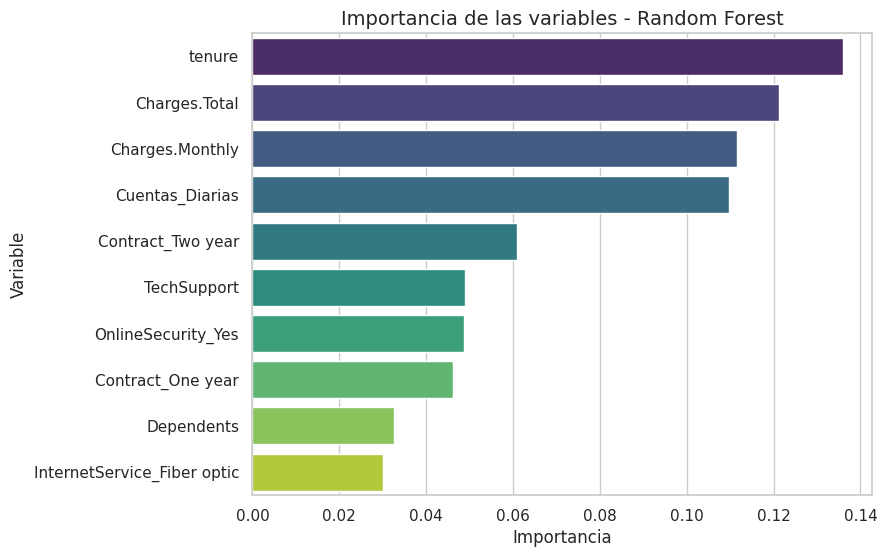

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancias desde el modelo ya entrenado
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Crear DataFrame ordenado por importancia
feat_importances = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 10 más relevantes
print("Top 10 variables más importantes para predecir Churn:")
print(feat_importances.head(10))

# --- Visualización ---
plt.figure(figsize=(8,6))
sns.barplot(
    x='Importancia',
    y='Variable',
    data=feat_importances.head(10),
    palette='viridis'
)
plt.title('Importancia de las variables - Random Forest', fontsize=14)
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


# Conclusion

# Informe de Factores de Cancelación de Clientes — Telecom X

## 1. Resumen Ejecutivo
- **Mejor modelo**: **Random Forest** (Accuracy 0.7704; F1 Churn=1: 0.59; Recall Churn=1: 0.62), superó al Árbol de Decisión en todas las métricas clave.
- **Factores más influyentes** (según importancia en Random Forest):
  - **Tenure** bajo (clientes nuevos) → Mayor riesgo de churn.
  - **Contract_One year** y **Contract_Two year** → Reducen el riesgo.
  - **Charges.Monthly** alto → Mayor riesgo.
  - **TotalCharges** alto (clientes antiguos) → Menor riesgo.
  - **InternetService_Fiber optic** → Asociado a mayor churn.
  - **PaymentMethod_Electronic check** → Asociado a mayor churn.
  - **TechSupport=1** y **OnlineSecurity=Yes** → Reducen churn.

---

## 2. Desempeño de Modelos (Test Set)

**Árbol de Decisión**
- Accuracy: **0.7292**
- Churn=1 → Precision: **0.49**, Recall: **0.57**, F1: **0.53**
- Matriz de confusión: `[[814, 219], [162, 212]]`

**Random Forest**
- Accuracy: **0.7704**
- Churn=1 → Precision: **0.56**, Recall: **0.62**, F1: **0.59**
- Matriz de confusión: `[[852, 181], [142, 232]]`

**Conclusión**: Random Forest generaliza mejor y detecta más clientes en riesgo.

---

## 3. Análisis de Overfitting / Underfitting
- **Árbol de Decisión**: probable *underfitting* (modelo demasiado simple).
- **Random Forest**: buen balance entre sesgo y varianza; posible mejora ajustando hiperparámetros (`n_estimators`, `max_depth`, `class_weight`).

---

## 4. Factores Clave (lectura accionable)

**Aumentan el riesgo (↑ churn):**
- Tenure bajo (primeros 3–6 meses).
- Charges.Monthly alto.
- InternetService_Fiber optic.
- PaymentMethod_Electronic check.

**Reducen el riesgo (↓ churn):**
- Contratos de mayor plazo (One year, Two year).
- TotalCharges alto.
- Servicios de soporte y seguridad (TechSupport, OnlineSecurity).

---

## 5. Estrategias de Retención

### A. Clientes nuevos
- Programa de onboarding intensivo en primeros 90 días.
- Beneficios escalonados por permanencia.

### B. Precio y contratos
- Incentivar migración a contratos de 1–2 años con beneficios claros.
- Revisar tarifas para clientes con alto Charges.Monthly.

### C. Pago
- Migrar clientes de Electronic check a métodos automáticos con incentivos.
- Alertas proactivas ante fallos de pago.

### D. Calidad de servicio
- Monitoreo proactivo de clientes fibra.
- Garantías de servicio y compensaciones.

### E. Soporte
- Ofrecer TechSupport y OnlineSecurity a clientes en riesgo.
- Generar comunidad y contenido de valor.